# SIIM-ISIC Melanoma Classification: Exploratory Data Analysis

#### Authors: Jaime Ferrando Huertas, Javier Martínez Bernia
#### May 2021 @ MIARFID, UPV

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

### Load the data

In [2]:
train_dir = 'data/train/'
test_dir = 'data/test'

train_data = [file for file in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir,file))]
test_data = [file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir,file))]
print('10 training images', train_data[:10])

10 training images ['ISIC_8600358.jpg', 'ISIC_4957730.jpg', 'ISIC_7452152.jpg', 'ISIC_8455853.jpg', 'ISIC_2657946.jpg', 'ISIC_8189028.jpg', 'ISIC_0422301.jpg', 'ISIC_2049142.jpg', 'ISIC_2729747.jpg', 'ISIC_1368217.jpg']


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [5]:
test.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

In [6]:
print(train.sex.value_counts())

male      17080
female    15981
Name: sex, dtype: int64


/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


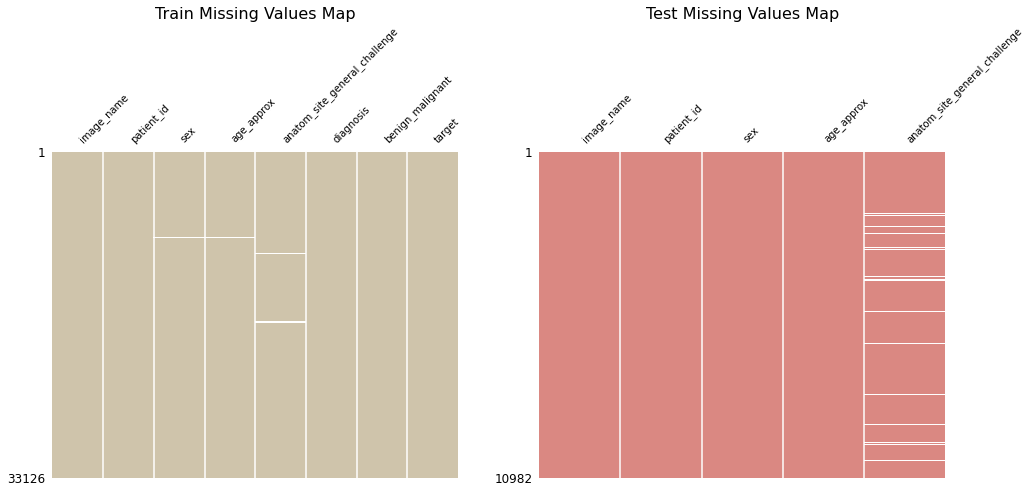

In [7]:
import missingno as msno
# Misssing Values
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

msno.matrix(train, ax = ax1, color=(207/255, 196/255, 171/255), fontsize=10)
msno.matrix(test, ax = ax2, color=(218/255, 136/255, 130/255), fontsize=10)

ax1.set_title('Train Missing Values Map', fontsize = 16)
ax2.set_title('Test Missing Values Map', fontsize = 16);

Out of 65 NAN values, 65 are benign and 0 malignant.


/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


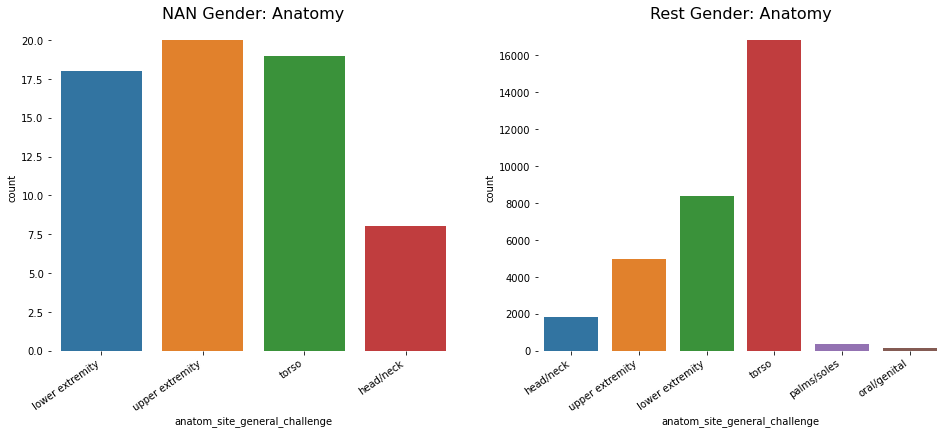

In [8]:
# SEX Fill
nan_sex = train[train['sex'].isna() == True]
is_sex = train[train['sex'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(nan_sex['anatom_site_general_challenge'], ax = ax1)
b = sns.countplot(is_sex['anatom_site_general_challenge'], ax = ax2)
ax1.set_title('NAN Gender: Anatomy', fontsize=16)
ax2.set_title('Rest Gender: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 65 NAN values, {} are benign and 0 malignant.'.format(nan_sex['benign_malignant'].value_counts()[0]))

In [9]:
# Check how many are males and how many females
anatomy = ['lower extremity', 'upper extremity', 'torso']
print(train[(train['anatom_site_general_challenge'].isin(anatomy)) & (train['target'] == 0)]['sex'].value_counts())

# Impute the missing values with male
train['sex'].fillna("male", inplace = True) 

male      15173
female    14523
Name: sex, dtype: int64


Out of 68 NAN values, 68 are benign and 0 malignant.


/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


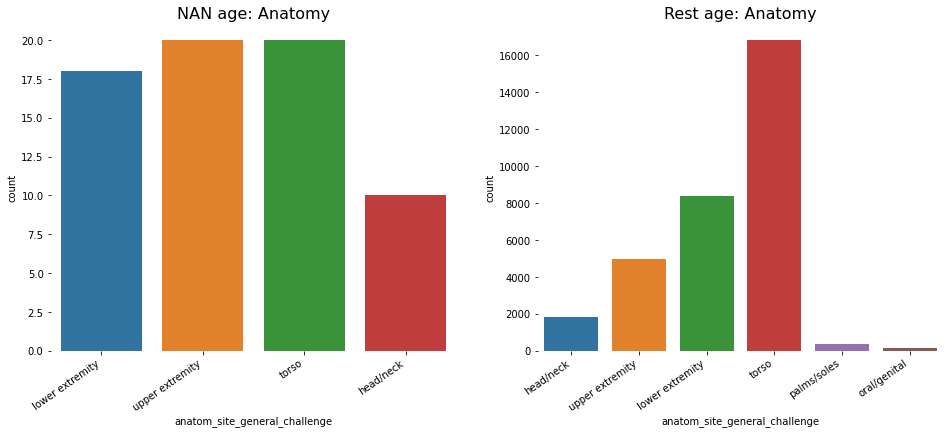

In [10]:
# AGE Fill
# Data
nan_age = train[train['age_approx'].isna() == True]
is_age = train[train['age_approx'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(nan_age['anatom_site_general_challenge'], ax = ax1)
b = sns.countplot(is_age['anatom_site_general_challenge'], ax = ax2)
ax1.set_title('NAN age: Anatomy', fontsize=16)
ax2.set_title('Rest age: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 68 NAN values, {} are benign and 0 malignant.'.format(nan_age['benign_malignant'].value_counts()[0]))

In [11]:
# Check the mean age
anatomy = ['lower extremity', 'upper extremity', 'torso']
median = train[(train['anatom_site_general_challenge'].isin(anatomy)) & (train['target'] == 0) & (train['sex'] == 'male')]['age_approx'].median()
print('Median is:', median)

# Impute the missing values with male
train['age_approx'].fillna(median, inplace = True) 

Median is: 50.0


/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/javi/anaconda3/en

From all missing values, 518 are benign and 9 malignant.


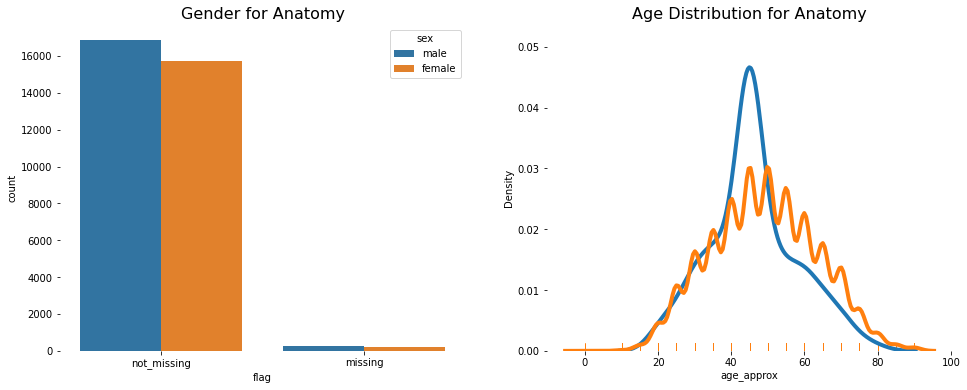

In [12]:
# Anatomy (TRAIN)
anatomy = train.copy()
anatomy['flag'] = np.where(train['anatom_site_general_challenge'].isna()==True, 'missing', 'not_missing')

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

sns.countplot(anatomy['flag'], hue=anatomy['sex'], ax=ax1)

sns.distplot(anatomy[anatomy['flag'] == 'missing']['age_approx'], 
             hist=False, rug=True, label='Missing', ax=ax2, 
             kde_kws=dict(linewidth=4))
sns.distplot(anatomy[anatomy['flag'] == 'not_missing']['age_approx'], 
             hist=False, rug=True, label='Not Missing', ax=ax2, 
             kde_kws=dict(linewidth=4))

ax1.set_title('Gender for Anatomy', fontsize=16)
ax2.set_title('Age Distribution for Anatomy', fontsize=16)
sns.despine(left=True, bottom=True);

# Benign - malignant
ben_mal = anatomy[anatomy['flag'] == 'missing']['benign_malignant'].value_counts()
print('From all missing values, {} are benign and {} malignant.'.format(ben_mal[0], ben_mal[1]))

In [38]:
# Impute for anatomy
train['anatom_site_general_challenge'].fillna('torso', inplace = True) 

/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/javi/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code

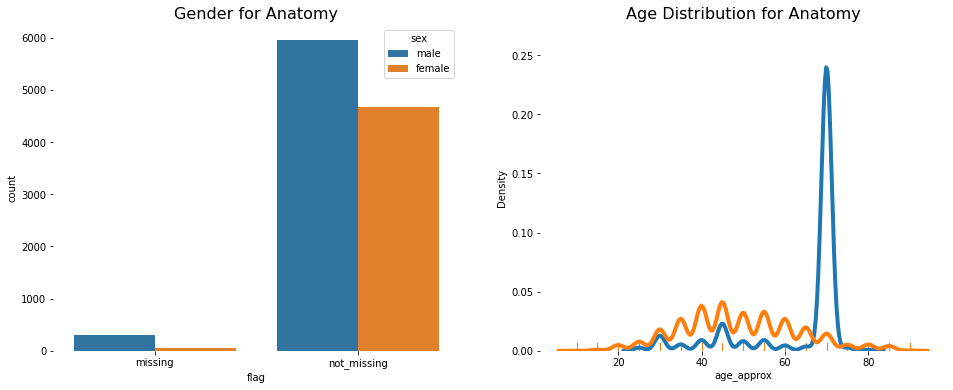

In [39]:
# Anatomy (TEST)
anatomy = test.copy()
anatomy['flag'] = np.where(test['anatom_site_general_challenge'].isna()==True, 'missing', 'not_missing')

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

sns.countplot(anatomy['flag'], hue=anatomy['sex'], ax=ax1)

sns.distplot(anatomy[anatomy['flag'] == 'missing']['age_approx'],
             hist=False, rug=True, label='Missing', ax=ax2, 
             kde_kws=dict(linewidth=4, bw=0.1))

sns.distplot(anatomy[anatomy['flag'] == 'not_missing']['age_approx'], 
             hist=False, rug=True, label='Not Missing', ax=ax2, 
             kde_kws=dict(linewidth=4, bw=0.1))

ax1.set_title('Gender for Anatomy', fontsize=16)
ax2.set_title('Age Distribution for Anatomy', fontsize=16)
sns.despine(left=True, bottom=True);

In [43]:
# Select most frequent anatomy for age 70
value = test[test['age_approx'] == 70]['anatom_site_general_challenge'].value_counts().reset_index()['index'][0]

# Impute the value
test['anatom_site_general_challenge'].fillna(value, inplace = True) 

In [44]:
# Save the files
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

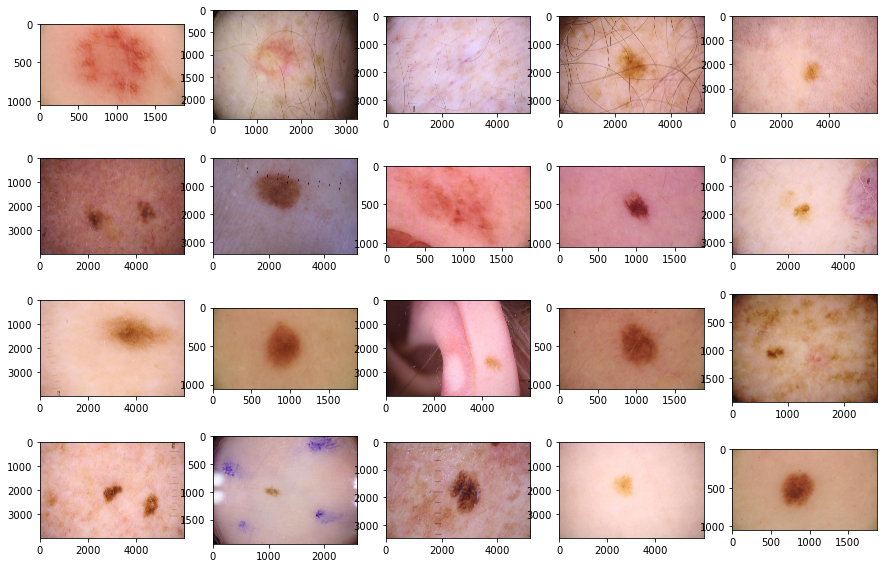

In [6]:
# See some images
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train_data[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

In [11]:
# Train
df = pd.DataFrame(train.benign_malignant.value_counts())
print(df, '\n')
print('Benign %: ', df.benign_malignant[0] / (df.benign_malignant[0] + df.benign_malignant[1]))
print('Malign %: ', df.benign_malignant[1] / (df.benign_malignant[0] + df.benign_malignant[1]))

# Test count
print('Test images: ',len(test.image_name))

           benign_malignant
benign                32542
malignant               584 

Benign %:  0.9823703435367989
Malign %:  0.01762965646320111
Test images:  10982


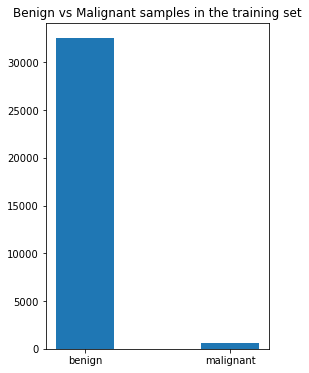

In [22]:
fig = plt.figure(figsize=(4,6))
plt.bar(['benign', 'malignant'],df.benign_malignant, 0.4)
plt.title("Benign vs Malignant samples in the training set")
plt.show()

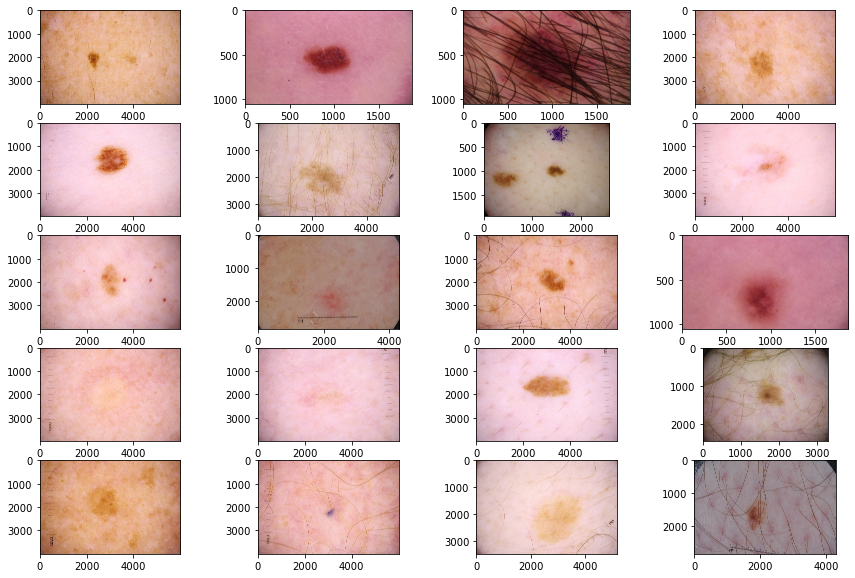

In [23]:
# View some benign images
vals = train[train['benign_malignant']=='benign']['image_name'].index.values

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train[train['benign_malignant']=='benign']['image_name'][vals[i]] + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

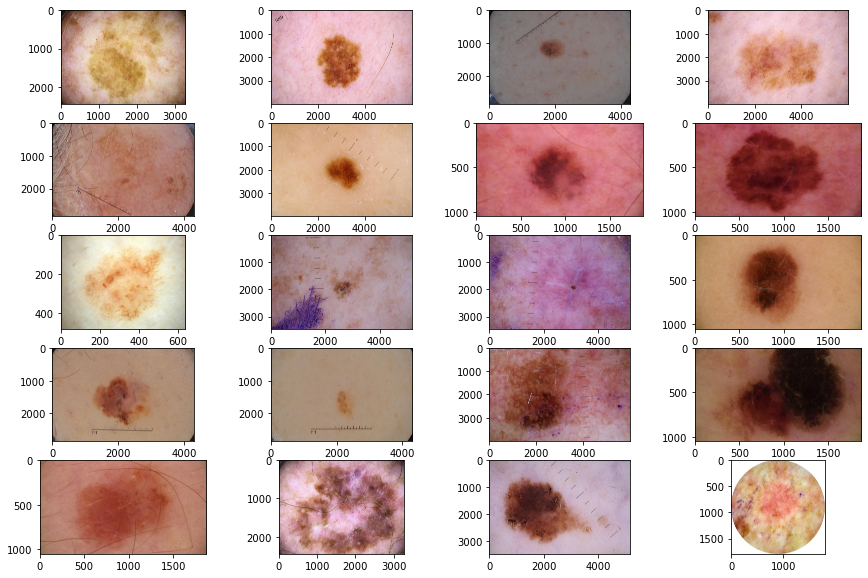

In [24]:
# View some malignant images
vals = train[train['benign_malignant']=='malignant']['image_name'].index.values

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = Image.open(train_dir + train[train['benign_malignant']=='malignant']['image_name'][vals[i]] + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=plt.cm.bone)
    fig.add_subplot

In [14]:
# Which part of the body
df = pd.DataFrame(train.anatom_site_general_challenge.value_counts())
df['per'] = train.anatom_site_general_challenge.value_counts() / train.anatom_site_general_challenge.value_counts().sum() * 100
print(df)

                 anatom_site_general_challenge        per
torso                                    16845  51.673364
lower extremity                           8417  25.819810
upper extremity                           4983  15.285745
head/neck                                 1855   5.690359
palms/soles                                375   1.150342
oral/genital                               124   0.380380


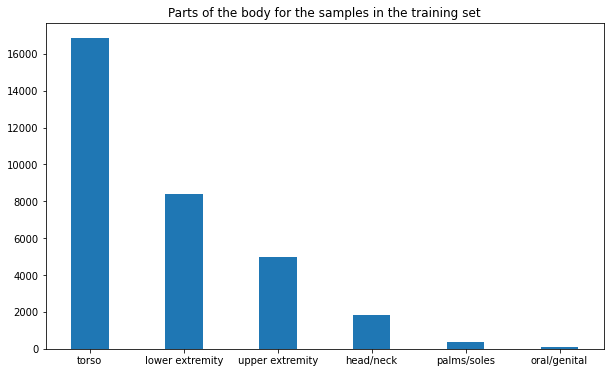

In [15]:
fig = plt.figure(figsize=(10,6))
plt.bar(list(df.index),df.anatom_site_general_challenge, 0.4)
plt.title("Parts of the body for the samples in the training set")
plt.show()

In [16]:
# Diagnosis
df = pd.DataFrame(train.diagnosis.value_counts())
df['%'] = train.diagnosis.value_counts() / train.diagnosis.value_counts().sum() * 100
print(df)

                                    diagnosis          %
unknown                                 27124  81.881302
nevus                                    5193  15.676508
melanoma                                  584   1.762966
seborrheic keratosis                      135   0.407535
lentigo NOS                                44   0.132826
lichenoid keratosis                        37   0.111695
solar lentigo                               7   0.021131
atypical melanocytic proliferation          1   0.003019
cafe-au-lait macule                         1   0.003019


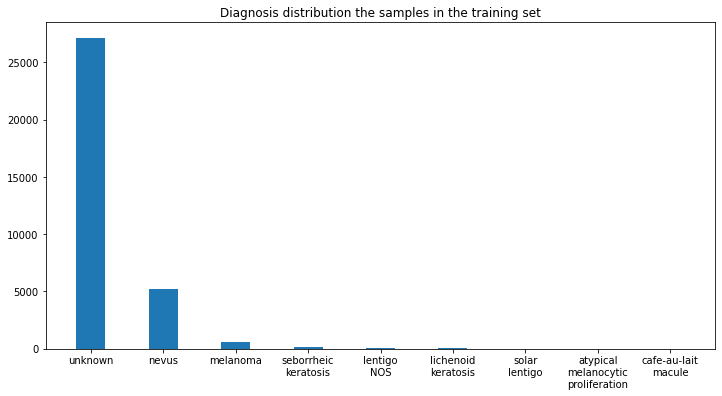

In [17]:
fig = plt.figure(figsize=(12,6))
index = [i.replace(' ', '\n') for i in list(df.index)]
plt.bar(index,df.diagnosis, 0.4)
plt.title("Diagnosis distribution the samples in the training set")
plt.show()

In [61]:
# Function for viewing images

def view_images(images, title = '', aug = None):
    width = 6
    height = 4
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    for im in range(0, height * width):  
        image = Image.open(os.path.join(train_dir, list(images)[im]+ '.jpg'))
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    plt.show()

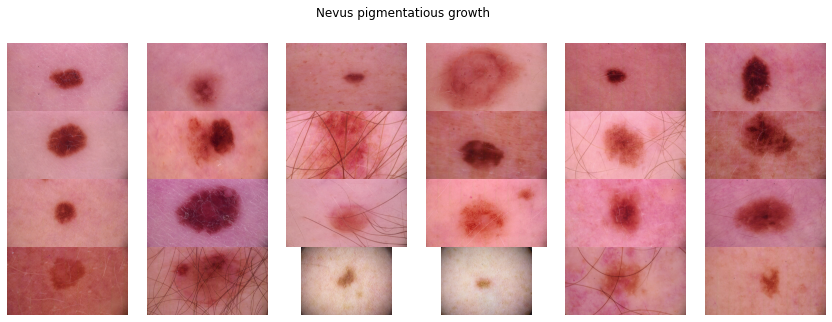

In [62]:
view_images(train[train['diagnosis']=='nevus']['image_name'], title="Nevus pigmentatious growth");

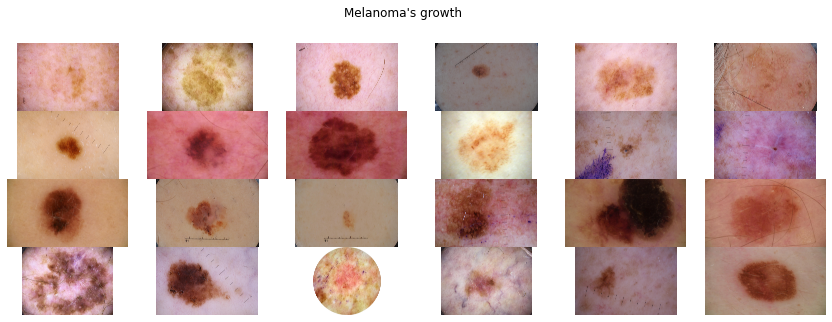

In [63]:
view_images(train[train['diagnosis']=='melanoma']['image_name'], title="Melanoma's growth");

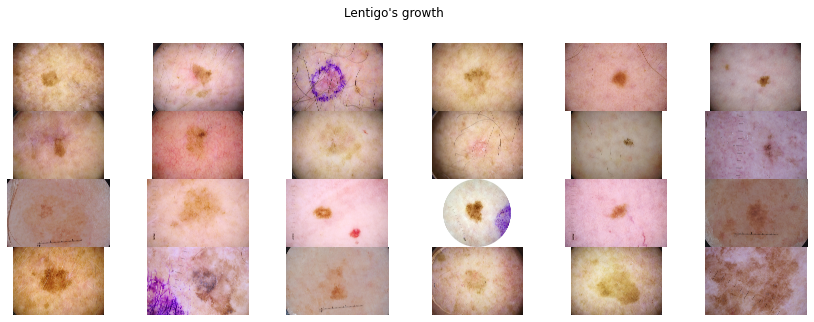

In [64]:
view_images(train[train['diagnosis']=='lentigo NOS']['image_name'], title="Lentigo's growth");

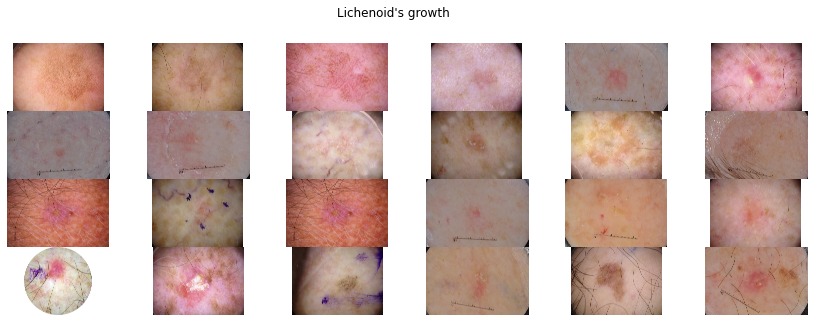

In [65]:
view_images(train[train['diagnosis']=='lichenoid keratosis']['image_name'], title="Lichenoid's growth");

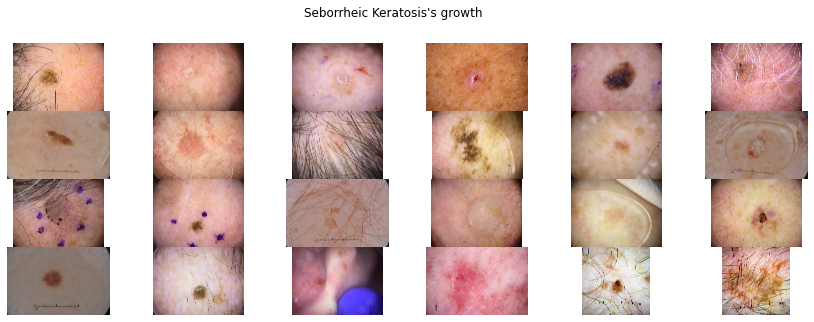

In [66]:
view_images(train[train['diagnosis']=='seborrheic keratosis']['image_name'], title="Seborrheic Keratosis's growth");

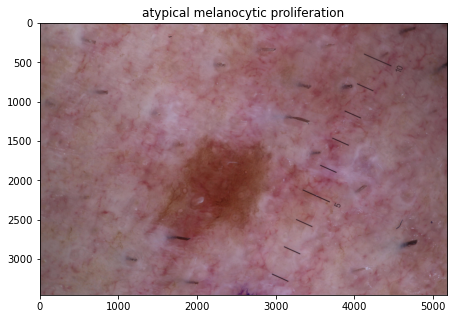

In [67]:
#print(train[train['diagnosis']=='atypical melanocytic proliferation'])
image = Image.open(os.path.join(train_dir, train[train['diagnosis']=='atypical melanocytic proliferation']['image_name'].to_string(index=None).strip() + '.jpg'))
fig=plt.figure(figsize=(8, 5))
plt.imshow(image, cmap=plt.cm.bone)
plt.title('atypical melanocytic proliferation')
plt.show()

In [18]:
# Train
df = pd.DataFrame(train.age_approx.value_counts())
df['%'] = train.age_approx.value_counts() / train.age_approx.value_counts().sum()
print(df)

      age_approx         %
45.0        4466  0.134819
50.0        4338  0.130955
55.0        3824  0.115438
40.0        3576  0.107951
60.0        3240  0.097808
35.0        2850  0.086035
65.0        2527  0.076284
30.0        2358  0.071183
70.0        1968  0.059410
25.0        1544  0.046610
75.0         981  0.029614
20.0         655  0.019773
80.0         419  0.012649
85.0         149  0.004498
15.0         132  0.003985
90.0          80  0.002415
10.0          17  0.000513
0.0            2  0.000060


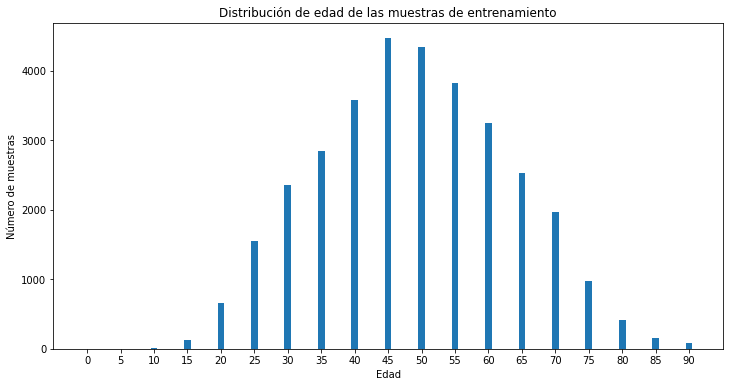

In [23]:
fig = plt.figure(figsize=(12,6))
plt.bar(list(df.index), df.age_approx, 1)
plt.xticks(np.arange(min(list(df.index)), max(list(df.index))+1, 5.0))
plt.title("Distribución de edad de las muestras de entrenamiento")
plt.xlabel("Edad")
plt.ylabel("Número de muestras")
plt.show()

In [12]:
# Test
df = pd.DataFrame(test.age_approx.value_counts())
df['%'] = test.age_approx.value_counts() / test.age_approx.value_counts().sum()
print(df)

      age_approx         %
45.0        1587  0.144509
40.0        1452  0.132216
55.0        1265  0.115188
50.0        1230  0.112001
35.0        1032  0.093972
60.0        1032  0.093972
70.0         815  0.074212
65.0         756  0.068840
30.0         702  0.063923
25.0         298  0.027135
80.0         207  0.018849
75.0         201  0.018303
20.0         187  0.017028
85.0         156  0.014205
15.0          41  0.003733
90.0          14  0.001275
10.0           7  0.000637


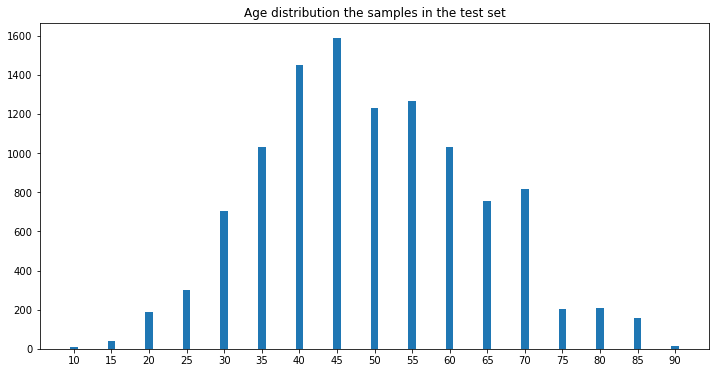

In [13]:
fig = plt.figure(figsize=(12,6))
plt.bar(list(df.index), df.age_approx, 1)
plt.xticks(np.arange(min(list(df.index)), max(list(df.index))+1, 5.0))
plt.title("Age distribution the samples in the test set")
plt.show()

In [76]:
def view_images_normalized(images, title = '', aug = None):
    width = 6
    height = 5
    fig, axs = plt.subplots(height, width, figsize=(15,15))
    for im in range(0, height * width):  
        image = cv2.imread(os.path.join(train_dir, list(images)[im]+ '.jpg'), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(256,256))
        image[:, :, 0] = clahe.apply(image[:, :, 0])
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)

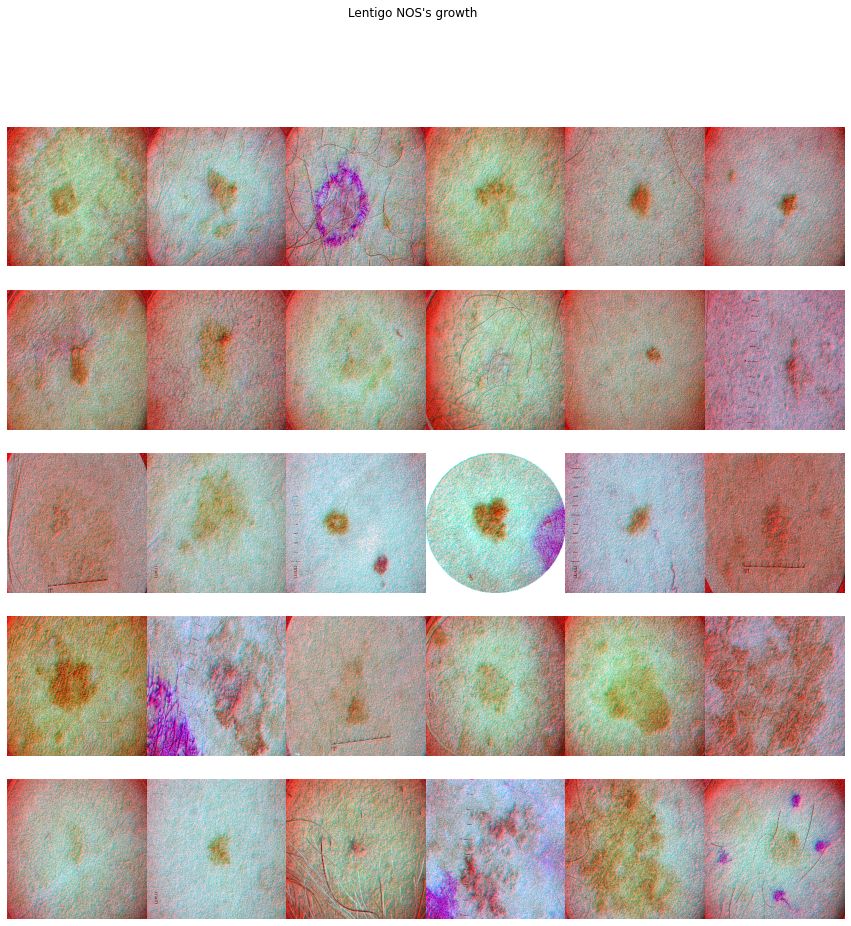

In [77]:
view_images_normalized(train[train['diagnosis']=='lentigo NOS']['image_name'], title="Lentigo NOS's growth");

In [107]:
# Ben graham processing from first competition
def view_images_ben_graham(images, title = '', aug = None):
    width = 6
    height = 5
    fig, axs = plt.subplots(height, width, figsize=(15,15))
    for im in range(0, height * width):  
        image = cv2.imread(os.path.join(train_dir, list(images)[im]+ '.jpg'), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        image = cv2.resize(image, (256, 256))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 256/10) ,-4 ,128)
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)    
    plt.suptitle(title)

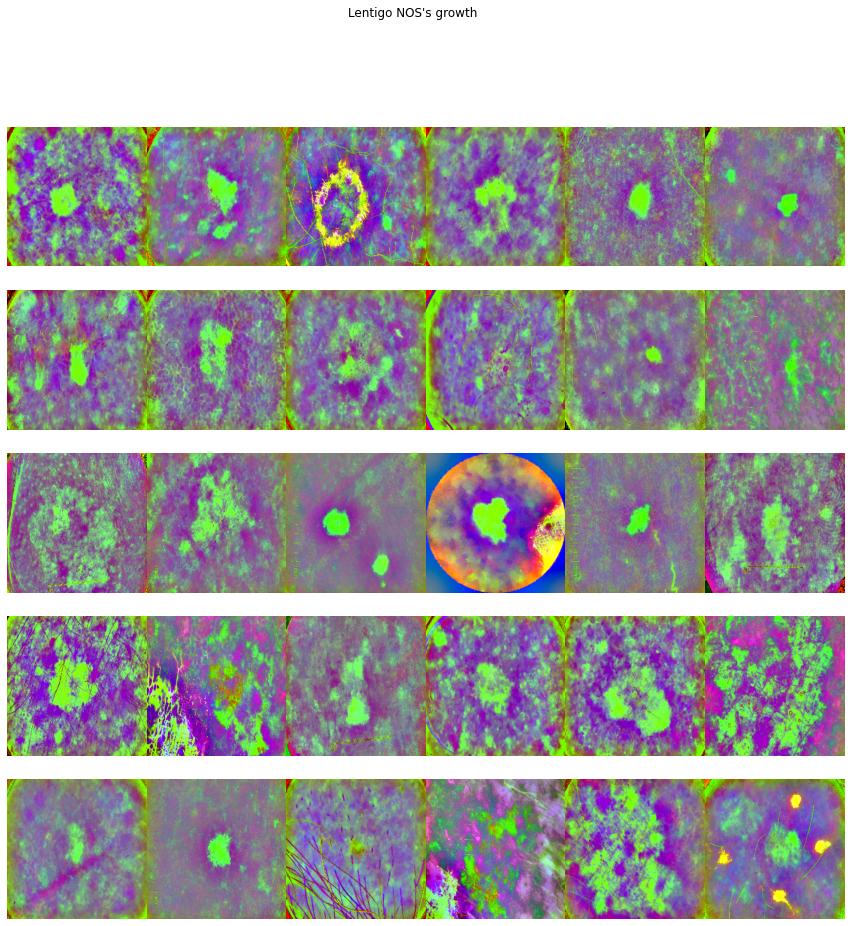

In [108]:
view_images_ben_graham(train[train['diagnosis']=='lentigo NOS']['image_name'], title="Lentigo NOS's growth");

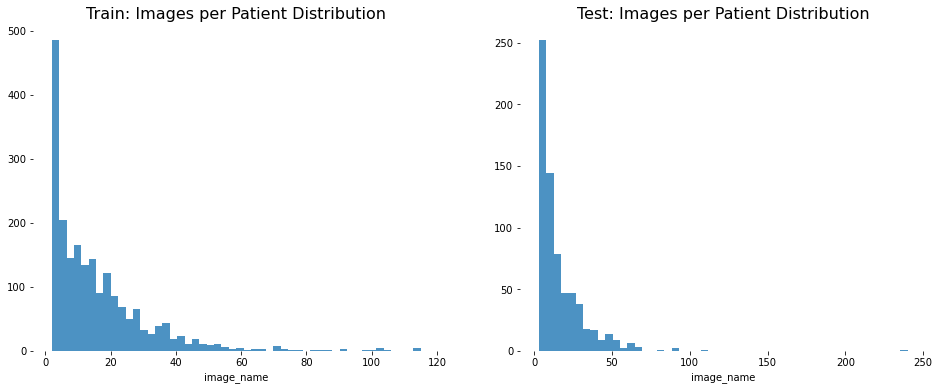

In [88]:
# Images per pacient
patients_count_train = train.groupby(by='patient_id')['image_name'].count().reset_index()
patients_count_test = test.groupby(by='patient_id')['image_name'].count().reset_index()
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.distplot(patients_count_train['image_name'], kde=False, bins=50, 
                 ax=ax1, hist_kws={'alpha': 0.8})
b = sns.distplot(patients_count_test['image_name'], kde=False, bins=50, 
                 ax=ax2, hist_kws={'alpha': 0.8})
    
ax1.set_title('Train: Images per Patient Distribution', fontsize=16)
ax2.set_title('Test: Images per Patient Distribution', fontsize=16)
sns.despine(left=True, bottom=True);

In [103]:
# Image sizes
shapes_train = []

for k, path in enumerate(train_dir + train['image_name'] + '.jpg'):
    image = Image.open(path)
    shapes_train.append(image.size)
    
    if k >= 200: break
        
shapes_train = pd.DataFrame(data = shapes_train, columns = ['H', 'W'], dtype='object')
shapes_train['Size'] = '[' + shapes_train['H'].astype(str) + ', ' + shapes_train['W'].astype(str) + ']'


/home/javi/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


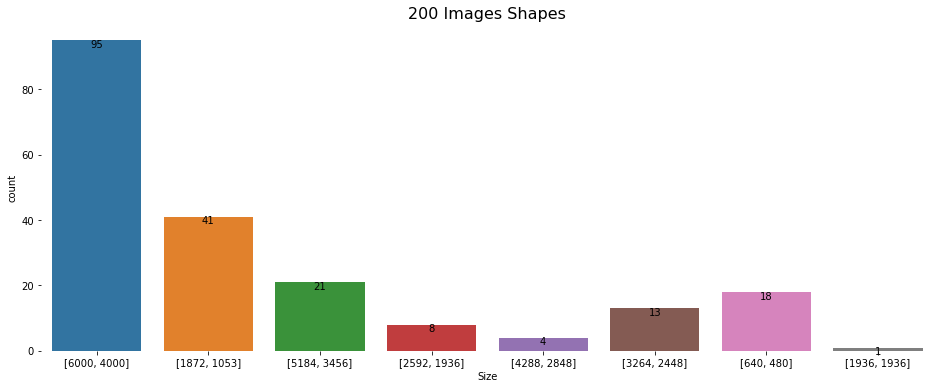

In [104]:
plt.figure(figsize = (16, 6))

a = sns.countplot(shapes_train['Size'])

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, -4), textcoords = 'offset points')
    
plt.title('200 Images Shapes', fontsize=16)
sns.despine(left=True, bottom=True);

In [109]:
# Remove hair
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))

    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)

    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)

    return final_image

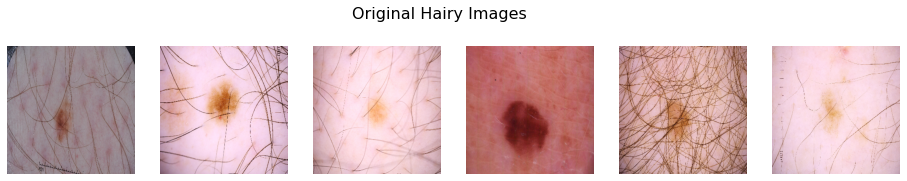

In [124]:
hairy_photos = train[train["sex"] == 'male'].reset_index().iloc[[11, 14, 17, 22, 33, 34]]
image_list = hairy_photos['image_name'] + '.jpg'
image_list = image_list.reset_index()['image_name']

# Show the Augmented Images
plt.figure(figsize=(16,3))
plt.suptitle("Original Hairy Images", fontsize = 16)
    
for k, path in enumerate(image_list):
    image = cv2.imread(train_dir + path)
    image = cv2.resize(image,(300, 300))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
    plt.subplot(1, 6, k+1)
    plt.imshow(image)
    plt.axis('off')

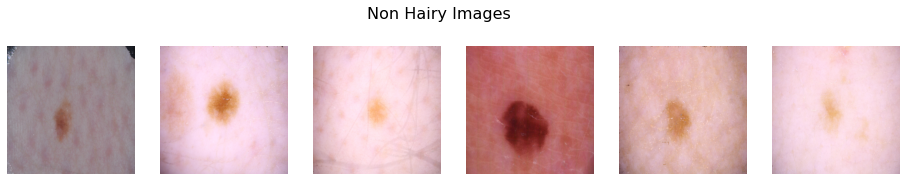

In [126]:
plt.figure(figsize=(16,3))
plt.suptitle("Non Hairy Images", fontsize = 16)
    
for k, path in enumerate(image_list):
    image = cv2.imread(train_dir + path)
    image = cv2.resize(image,(300, 300))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = hair_remove(image)
        
    plt.subplot(1, 6, k+1)
    plt.imshow(image)
    plt.axis('off')

### 2019 + 2020 Data

In [6]:
# Read 2020
train_dir = 'data/train/'
test_dir = 'data/test'

train_data = [file for file in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir,file))]
test_data = [file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir,file))]

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Read 2019
train_dir_2019 = 'data/2019/ISIC_2019_Training_Input/'
train_data_2019 = [file for file in os.listdir(train_dir_2019) if os.path.isfile(os.path.join(train_dir_2019,file))]
train_2019_metadata = pd.read_csv('data/2019/ISIC_2019_Training_Metadata.csv')
train_2019_gt = pd.read_csv('data/2019/ISIC_2019_Training_GroundTruth.csv')

In [7]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [8]:
test.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

In [9]:
train_2019_metadata.head()

image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male

In [10]:
train_2019_gt.head()

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [11]:
# First, join the two dataframes from 2019
train_2019 = pd.merge(train_2019_metadata, train_2019_gt, on="image")
train_2019.head()

image  age_approx anatom_site_general lesion_id     sex  MEL   NV  \
0  ISIC_0000000        55.0      anterior torso       NaN  female  0.0  1.0   
1  ISIC_0000001        30.0      anterior torso       NaN  female  0.0  1.0   
2  ISIC_0000002        60.0     upper extremity       NaN  female  1.0  0.0   
3  ISIC_0000003        30.0     upper extremity       NaN    male  0.0  1.0   
4  ISIC_0000004        80.0     posterior torso       NaN    male  1.0  0.0   

   BCC   AK  BKL   DF  VASC  SCC  UNK  
0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [12]:
train_2019.drop('lesion_id', inplace=True, axis=1)
train_2019.head()

image  age_approx anatom_site_general     sex  MEL   NV  BCC   AK  \
0  ISIC_0000000        55.0      anterior torso  female  0.0  1.0  0.0  0.0   
1  ISIC_0000001        30.0      anterior torso  female  0.0  1.0  0.0  0.0   
2  ISIC_0000002        60.0     upper extremity  female  1.0  0.0  0.0  0.0   
3  ISIC_0000003        30.0     upper extremity    male  0.0  1.0  0.0  0.0   
4  ISIC_0000004        80.0     posterior torso    male  1.0  0.0  0.0  0.0   

   BKL   DF  VASC  SCC  UNK  
0  0.0  0.0   0.0  0.0  0.0  
1  0.0  0.0   0.0  0.0  0.0  
2  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0   0.0  0.0  0.0  
4  0.0  0.0   0.0  0.0  0.0

In [13]:
patient_id = ['IP_2019_' + str(i) for i in range(len(train_2019))]
train_2019['patient_id'] = patient_id

# Change the name of the columns
train_2019 = train_2019.rename(columns={'image': 'image_name', 
                                        'anatom_site_general': 'anatom_site_general_challenge'})

# Permute columns to fit to 2020
train_2019 = train_2019[['image_name',
                         'patient_id',
                         'sex',
                         'age_approx',
                         'anatom_site_general_challenge',
                         'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']]


train_2019.head()

image_name patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_0000000  IP_2019_0  female        55.0                anterior torso   
1  ISIC_0000001  IP_2019_1  female        30.0                anterior torso   
2  ISIC_0000002  IP_2019_2  female        60.0               upper extremity   
3  ISIC_0000003  IP_2019_3    male        30.0               upper extremity   
4  ISIC_0000004  IP_2019_4    male        80.0               posterior torso   

   MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  
0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [14]:
# Now, adapt the 2020 dataframe to fit the 9 labels

#print(train['diagnosis'].unique())
#train.head()

mel = list()
nv = list()
bkl = list()
unk = list()

for index, row in train.iterrows():
    diag = row['diagnosis']
    if diag == 'unknown' or diag == 'cafe-au-lait macule' or diag == 'atypical melanocytic proliferation':
        unk.append(index)
    elif diag == 'nevus':
        nv.append(index)
    elif diag == 'melanoma':
        mel.append(index)
    elif diag == 'seborrheic keratosis' or diag == 'lichenoid keratosis' or diag == 'solar lentigo' or diag == 'lentigo NOS':
        bkl.append(index)

train['MEL'] = [0.0 for i in range(len(train))]
train['NV'] = [0.0 for i in range(len(train))]
train['BCC'] = [0.0 for i in range(len(train))]
train['AK'] = [0.0 for i in range(len(train))]
train['BKL'] = [0.0 for i in range(len(train))]
train['DF'] = [0.0 for i in range(len(train))]
train['VASC'] = [0.0 for i in range(len(train))]
train['SCC'] = [0.0 for i in range(len(train))]
train['UNK'] = [0.0 for i in range(len(train))]

for i in mel:
    train.at[i,'MEL'] = 1.0
    
for i in nv:
    train.at[i, 'NV'] = 1.0
    
for i in bkl:
    train.at[i, 'BKL'] = 1.0
    
for i in unk:
    train.at[i, 'UNK'] = 1.0

train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  \
0   unknown           benign       0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
1   unknown           benign       0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
2     nevus           benign       0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0   
3   unknown           benign       0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
4   unknown           benign       0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   

   UNK  
0  1.0  
1  1.0  
2  0.0  
3  1.0  
4  1.0

In [15]:
train.drop('diagnosis', inplace=True, axis=1)
train.drop('benign_malignant', inplace=True, axis=1)
train.drop('target', inplace=True, axis=1)

In [16]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

   MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
2  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0

In [17]:
# Now, we can join both dataframes
train_full = pd.concat([train, train_2019], axis=0)
train_full.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

   MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
2  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0

In [18]:
test.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

### Fill missing values on train and test

In [21]:
train_full['sex'].fillna("male", inplace = True)
train_full['age_approx'].fillna(50.0, inplace = True)
train_full['anatom_site_general_challenge'].fillna('torso', inplace = True)
value = test[test['age_approx'] == 70]['anatom_site_general_challenge'].value_counts().reset_index()['index'][0]
test['anatom_site_general_challenge'].fillna(value, inplace = True)

In [23]:
# Save the files
train.to_csv('train_full.csv', index=False)
test.to_csv('test_full.csv', index=False)